**Hello everyone!**

In this notebook we start using ML algorithms to analyse a usual dataset. We are going to use Linear Regression method for create a model on dataset and then evaluate the results!

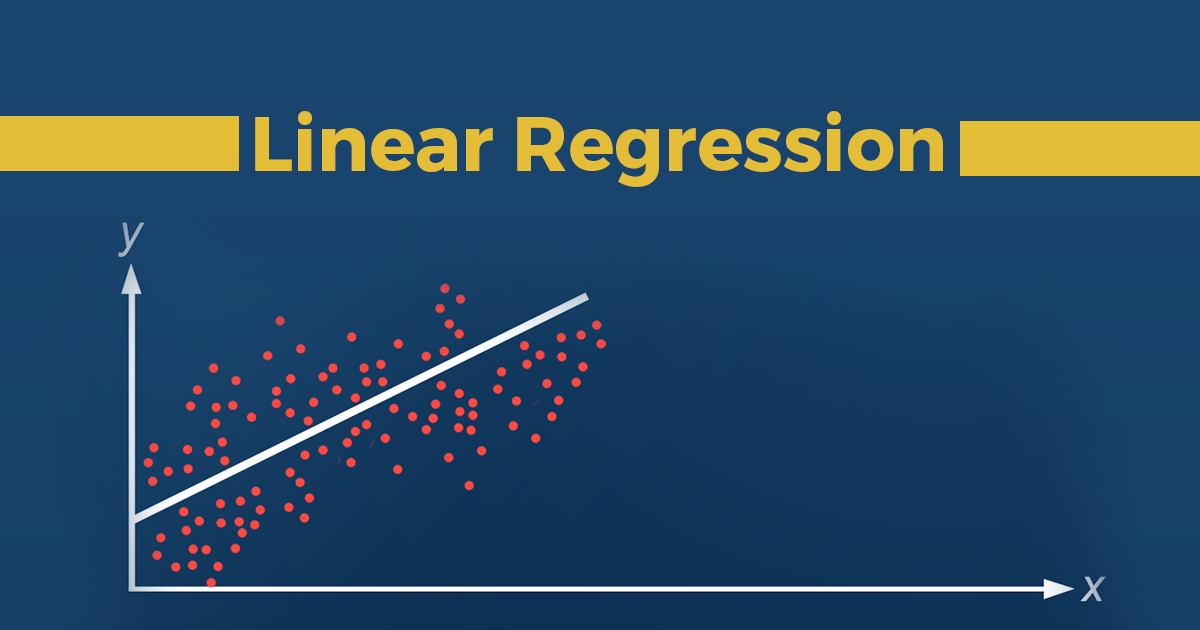

In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression. This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.

Regression makes a Linear equation that describes realationship between two or more variables. for example if we have x feature for predicting y (target variable) linear regressions generate a Two-dimensional line equation and if we have n (more than 2) variables linear regressions generate a n-dimenshional line equation like this:

![](https://s4.uupload.ir/files/untitled-2_q7qg.jpg)

You can learn more about Linear Regression here:

https://en.wikipedia.org/wiki/Linear_regression (English)

https://blog.faradars.org/simple-linear-regression/ (Persian)
    
We use Real Estate dataset to make a model that predict house prices based on 6 features. In the following, You can realize more about dataset.



In [ ]:
#first we import all the libraries we're gonna need.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1. Import & getting basic info of Dataset

In [ ]:
df = pd.read_csv('../input/real-estate-price-prediction/Real estate.csv')

In [ ]:
df.info()

In [ ]:
df.head()

# 2. Exploratory Data Analysis

In [ ]:
sns.pairplot(df)

As we could see, there are 5 factors that maybe have effects on price. Transaction date, house age, distance to the nearest MRT station, number of convenience stores, latitude and longitude.

with correlation analysis we can figure out the basis information about dependence between features.

In [ ]:
df.corr()

Based on this information X3 factor had the most negetive correlation with price. Also we can see the strong correlation between longitude and distance to the nearest MRT station.

# 3. Features and Target Variable

In [ ]:
#we can delet 'No' column to increase power of model.

df.drop(['No'], axis = 1, inplace = True)

#X : Features
#y : Target variable

X = df.drop(['Y house price of unit area'], axis = 1)
y = df['Y house price of unit area']


# 4. Train & Test set

In [ ]:
#we use train_test_split from sklearn.model_selection to devide dataset to train and test set.

from sklearn.model_selection import train_test_split 

#train set in a bigger sample of dataset that model uses to learn.
#test set in smaller sample of dataset that model should be evaluated in.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#random_state before spliting controls shuffling dataset

# 5. Train the model

In [ ]:
#we can define a model with the desired algorithm using "LinearRegression" from "sklearn.linear_model"

#for better understanding of what happend in next step we can make a Linear Regression Class to explain its functions.

"""
class Linear_Regression:

    def __init__(self):
        self.x = 0
        self.y = 0
        self.alpha0 = 0
        self.alpha1 = 0
        self.coefficients = [self.alpha0, self.alpha1]
    
    def fit(self, x, y):
        self.x = np.array(x)
        self.y = np.array(y)
        
        y_mean = np.mean(self.y)
        x_mean = np.mean(self.x)
        
        self.alpha1 = np.sum((self.x - x_mean)*(self.y - y_mean))/np.sum((self.x - x_mean)**2)
        self.alpha0 = y_mean - (self.alpha1 * x_mean)
        
        self.coefficients = [self.alpha0, self.alpha1]
        return self
    
    def predict(self, x):
        y_pred = self.alpha0 + (self.alpha1 * x)
        return y_pred
        pass
"""

from sklearn.linear_model import LinearRegression

model= LinearRegression() #our model is a Linear Regression

model.fit(X_train, y_train) #model.fit builds the model base on train set and returns the Coefficient of each feature.

In [ ]:
pd.DataFrame(model.coef_, X.columns, columns=['Coeficient'])

as we can see 'latitude' has the most effects on model. 

# 6. Predicting Test set
Now model learn how to calculate the house price with its features. So we predict the test set to see results.

In [ ]:
y_pred = model.predict(X_test)

# 7. Evaluating Model
In this step we have prediction values and real ones. So we should compare them to see how reliable our model is.

In [ ]:
from sklearn import metrics #we use this function to compare sets

MAE = metrics.mean_absolute_error(y_test, y_pred) # mean ( y_test - y_pred )
MSE = metrics.mean_squared_error(y_test, y_pred)  # (mean (y_test - y_pred)) ^ 2
RMSE = np.sqrt(MSE)                               # sqrt ((mean (y_test - y_pred)) ^ 2)

pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

Also we can compare the mean of Target variable in dataset and predict values.

In [ ]:
print('Predict mean =',np.mean(y_pred),'\nReal mean =',np.mean(df['Y house price of unit area']))
print(abs(np.mean(y_pred) - np.mean(df['Y house price of unit area'])),' is diffrence.')

# 8. Residuals

In [ ]:
test_residuals = y_test - y_pred

sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y-Test')
plt.ylabel('Y-Pred')

In [ ]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', ls='--')

In [ ]:
sns.distplot(test_residuals, bins=25, kde=True)